In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ztest as ztest
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [126]:
df = pd.read_csv("insurance.csv")

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<AxesSubplot:title={'center':'charges'}, xlabel='charges', ylabel='Density'>

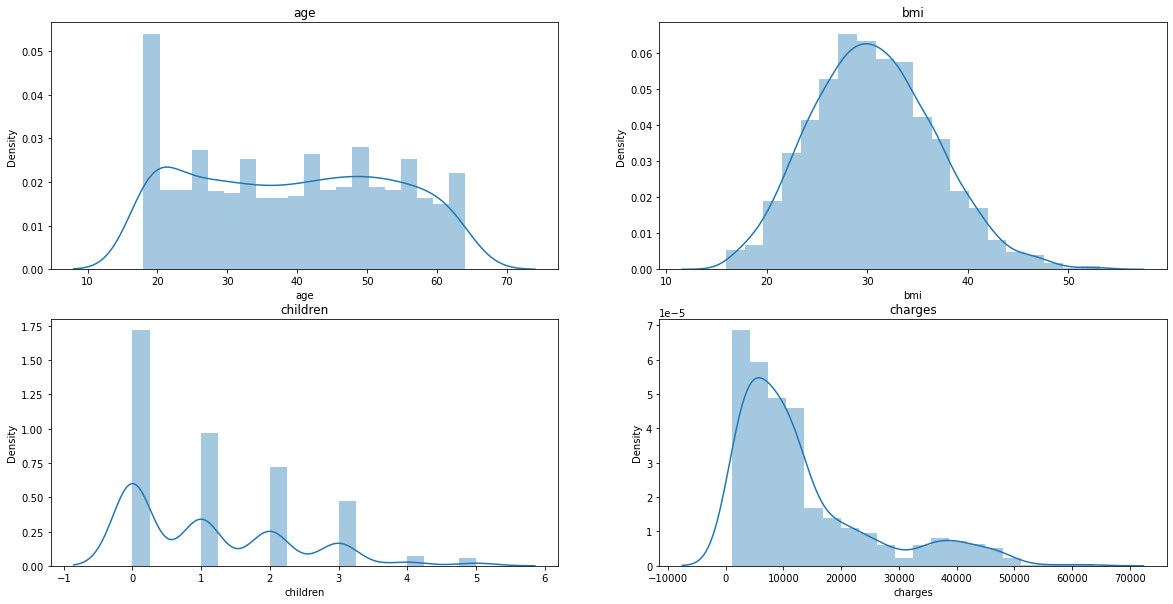

In [127]:
plt.figure(figsize=(20,10))


plt.subplot(2,2,1)
sns.distplot(df["age"], bins=20)
plt.title("age")

plt.subplot(2,2,2)
sns.distplot(df["bmi"], bins=20)
plt.title("bmi")

plt.subplot(2,2,3)
sns.distplot(df["children"], bins=20)
plt.title("children")

plt.subplot(2,2,4)
plt.title("charges")
sns.distplot(df["charges"], bins=20)


Text(0.5, 1.0, 'region')

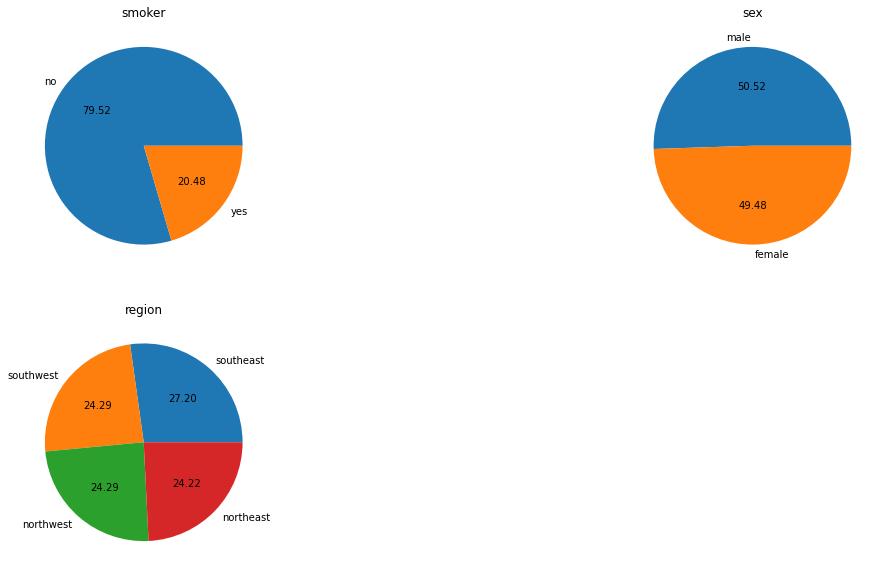

In [128]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.pie(df["smoker"].value_counts(), labels=df["smoker"].value_counts().index, autopct="%.2f")
plt.title("smoker")

plt.subplot(2,2,2)
plt.pie(df["sex"].value_counts(), labels=df["sex"].value_counts().index, autopct="%.2f")
plt.title("sex")

plt.subplot(2,2,3)
plt.pie(df["region"].value_counts(), labels=df["region"].value_counts().index, autopct="%.2f")
plt.title("region")

In [129]:
print(df["sex"].value_counts())
print(df["smoker"].value_counts())
print(df["region"].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


## Langkah #1 - Analisa Descriptive Statistic

### Pertanyaan

Berapa rata-rata umur pada data tersebut?

In [130]:
print("Rata-rata umur:", np.mean(df["age"]))

Rata-rata umur: 39.20702541106129


Berapa rata-rata tagihan kesehatan pada data tersebut?

In [131]:
print("Rata-rata tagihan kesehatan:", np.mean(df["charges"]))

Rata-rata tagihan kesehatan: 13270.422265141257


Berapa rata-rata nilai BMI dari yang merokok?

In [132]:
print("Rata-rata nilai BMI dari yang merokok:", np.mean(df[df["smoker"]=="yes"]["bmi"]))
print("Rata-rata nilai BMI dari yang tidak merokok:", np.mean(df[df["smoker"]=="no"]["bmi"]))

Rata-rata nilai BMI dari yang merokok: 30.708448905109503
Rata-rata nilai BMI dari yang tidak merokok: 30.651795112781922


Apakah variansi dari data charges perokok dan non perokok sama?

In [133]:
print("Variansi data charges perokok:", np.var(df[df["smoker"]=="yes"]["charges"]))
print("Variansi data charges non perokok:", np.var(df[df["smoker"]=="no"]["charges"]))
print("Variansi data charges perokok lebih tinggi daripada non perokok")

Variansi data charges perokok: 132721153.13625304
Variansi data charges non perokok: 35891656.00316425
Variansi data charges perokok lebih tinggi daripada non perokok


Apakah rata-rata umur perempuan dan laki-laki yang merokok sama?

In [134]:
print("Rata-rata umur perempuan yang merokok:", np.mean(df[(df["smoker"]=="yes") & (df["sex"]=="female")]["age"]))
print("Rata-rata umur laki-laki yang merokok:", np.mean(df[(df["smoker"]=="yes") & (df["sex"]=="male")]["age"]))
print("Rata-rata umur perempuan dan laki-laki yang merokok hampir sama")

Rata-rata umur perempuan yang merokok: 38.608695652173914
Rata-rata umur laki-laki yang merokok: 38.44654088050314
Rata-rata umur perempuan dan laki-laki yang merokok hampir sama


Mana yang lebih tinggi, rata-rata tagihan kesehatan perokok atau non perokok?

In [135]:
print("Rata-rata tagihan kesehatan perokok:", np.mean(df[df["smoker"]=="yes"]["charges"]))
print("Rata-rata tagihan kesehatan non perokok:", np.mean(df[df["smoker"]=="no"]["charges"]))
print("Rata-rata tagihan kesehatan perokok lebih tinggi daripada non perokok")

Rata-rata tagihan kesehatan perokok: 32050.23183153285
Rata-rata tagihan kesehatan non perokok: 8434.268297856199
Rata-rata tagihan kesehatan perokok lebih tinggi daripada non perokok


Mana yang lebih tinggi, rata-rata tagihan kesehatan perokok yang BMI-nya di atas 25 atau non perokok yang BMI-nya di atas 25

In [136]:
print("Rata-rata tagihan kesehatan perokok dengan BMI di atas 25:", np.mean(df[(df["smoker"]=="yes") & (df["bmi"]>25)]["charges"]))
print("Rata-rata tagihan kesehatan non perokok dengan BMI di atas 25:", np.mean(df[(df["smoker"]=="no") & (df["bmi"]>25)]["charges"]))
print("Rata-rata tagihan kesehatan perokok dengan BMI di atas 25 lebih tinggi daripada non perokok dengan BMI di atas 25")

Rata-rata tagihan kesehatan perokok dengan BMI di atas 25: 35116.90965694065
Rata-rata tagihan kesehatan non perokok dengan BMI di atas 25: 8629.589609712148
Rata-rata tagihan kesehatan perokok dengan BMI di atas 25 lebih tinggi daripada non perokok dengan BMI di atas 25


BMI mana yang lebih tinggi, seseorang laki-laki atau perempuan?

In [137]:
print("Rata-rata BMI perempuan:", np.mean(df[df["sex"]=="female"]["bmi"]))
print("Rata-rata BMI laki-laki:", np.mean(df[df["sex"]=="male"]["bmi"]))
print("Rata-rata BMI laki-laki sedikit lebih tinggi daripada perempuan")

Rata-rata BMI perempuan: 30.377749244713023
Rata-rata BMI laki-laki: 30.943128698224832
Rata-rata BMI laki-laki sedikit lebih tinggi daripada perempuan


BMI mana yang lebih tinggi, seseorang perokok atau non perokok?

In [138]:
print("Rata-rata BMI perokok:", np.mean(df[df["smoker"]=="yes"]["bmi"]))
print("Rata-rata BMI non perokok:", np.mean(df[df["smoker"]=="no"]["bmi"]))
print("Rata-rata BMI perokok sedikit lebih tinggi daripada non perokok")

Rata-rata BMI perokok: 30.708448905109503
Rata-rata BMI non perokok: 30.651795112781922
Rata-rata BMI perokok sedikit lebih tinggi daripada non perokok


## Langkah #2 - Analisa Variabel Kategorik (PMF)

### Pertanyaan

Gender mana yang memiliki tagihan paling tinggi?

In [139]:
df[df["charges"]==np.max(df["charges"])]

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.41,0,yes,southeast,63770.42801


In [140]:
print("Rata-rata tagihan perempuan:", np.mean(df[df["sex"] == "female"]["charges"]))
print("Rata-rata tagihan laki-laki:", np.mean(df[df["sex"] == "male"]["charges"]))

Rata-rata tagihan perempuan: 12569.57884383534
Rata-rata tagihan laki-laki: 13956.751177721886


Distribusi peluang tagihan di tiap-tiap region. Bagaimana bentuk distribusi tagihan dari tiap-tiap region?

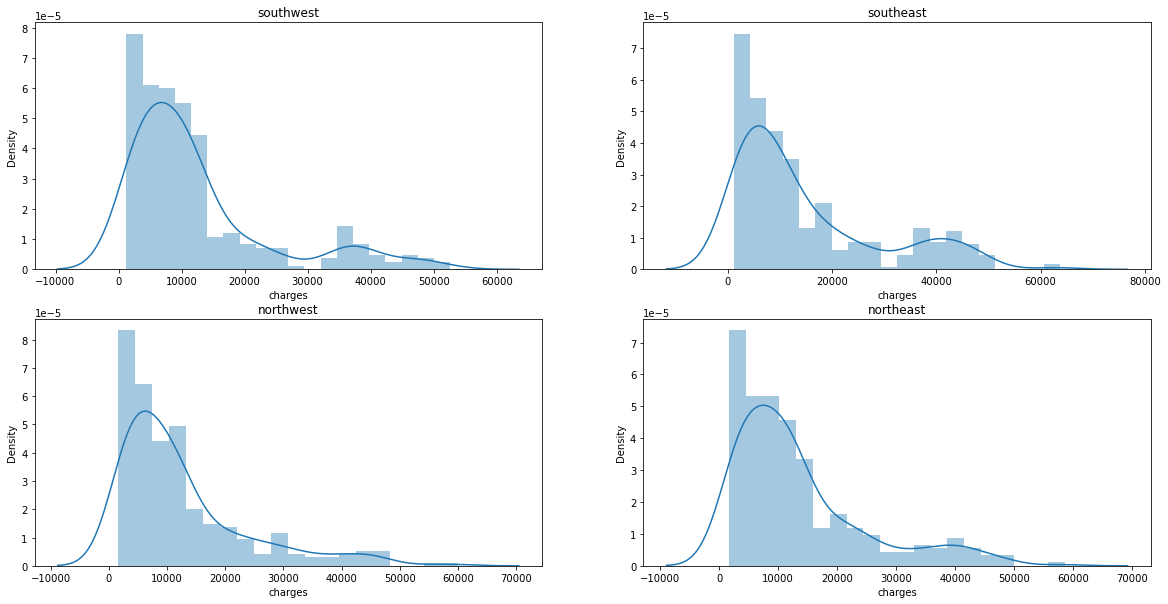

In [141]:
list_region = df["region"].unique()
i = 1
plt.figure(figsize=(20,10))

for x in list_region:
    plt.subplot(2,2,i)
    sns.distplot(df[df["region"]==x]["charges"], bins=20)
    plt.title(x)
    i = i + 1

Distribusi peluang tagihan perokok dan non perokok.

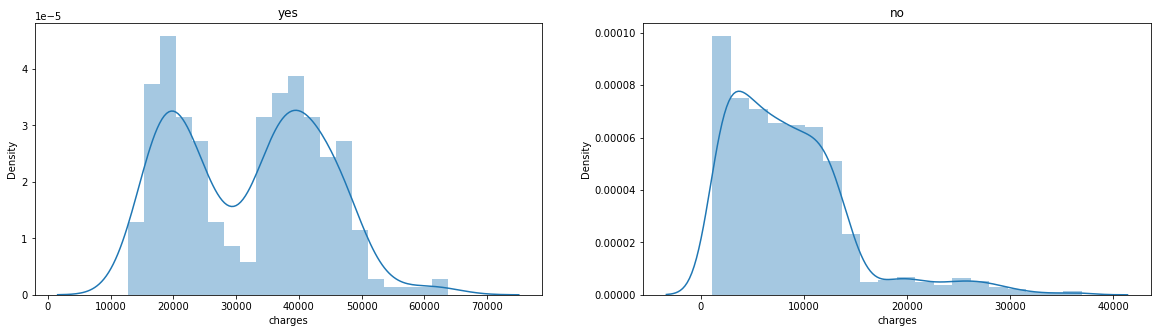

In [142]:
list_smoker = df["smoker"].unique()
i = 1
plt.figure(figsize=(20,5))

for x in list_smoker:
    plt.subplot(1,2,i)
    sns.distplot(df[df["smoker"]==x]["charges"], bins=20)
    plt.title(x)
    i = i + 1

Apakah setiap region memiliki proporsi data banyak orang yang sama?

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


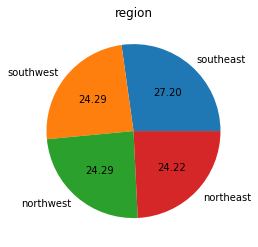

In [143]:
plt.pie(df["region"].value_counts(), labels=df["region"].value_counts().index, autopct="%.2f")
plt.title("region")

print(df["region"].value_counts())

Mana yang lebih tinggi proporsi perokok atau non perokok?

In [144]:
print(df["smoker"].value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?

In [145]:
jumlah_perokok = df[df["smoker"]=="yes"]["smoker"].count()
jumlah_perempuan_merokok = df[(df["smoker"]=="yes") & (df["sex"]=="female")]["smoker"].count()
peluang_perempuan_merokok = jumlah_perempuan_merokok / jumlah_perokok

print("Peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok:", peluang_perempuan_merokok)

Peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok: 0.4197080291970803


Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?

In [146]:
jumlah_laki_merokok = df[(df["smoker"]=="yes") & (df["sex"]=="male")]["smoker"].count()
peluang_laki_merokok = jumlah_laki_merokok / jumlah_perokok

print("Peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok:", peluang_laki_merokok)

Peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok: 0.5802919708029197


## Langkah #3 - Analisa Variabel Kontinu (CDF)

### Pertanyaan

Mencari kemungkinan terjadi, seorang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan di atas 16.700.

In [147]:
data_smoker_high_bmi = df[(df["smoker"] == "yes") & (df["bmi"] > 25)]
jumlah_smoker_high_bmi = data_smoker_high_bmi["smoker"].count()
jumlah_smoker_high_bmi_16700 = data_smoker_high_bmi[data_smoker_high_bmi["charges"] > 16700]["smoker"].count()

peluang_smoker_high_bmi = jumlah_smoker_high_bmi_16700 / jumlah_smoker_high_bmi

print("Peluang seorang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan di atas 16.700:", peluang_smoker_high_bmi)

Peluang seorang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan di atas 16.700: 0.9817351598173516


Berapa peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahui dia adalah perokok

In [148]:
data_smoker = df[df["smoker"] == "yes"]
jumlah_smoker = data_smoker["smoker"].count()
jumlah_smoker_16700 = data_smoker[data_smoker["charges"] > 16700]["smoker"].count()

peluang_smoker = jumlah_smoker_16700 / jumlah_smoker

print("Peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahui dia adalah perokok:", peluang_smoker)

Peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahui dia adalah perokok: 0.927007299270073


Mana yang lebih mungkin terjadi
- Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau
- Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k

Text(0.5, 1.0, 'low bmi')

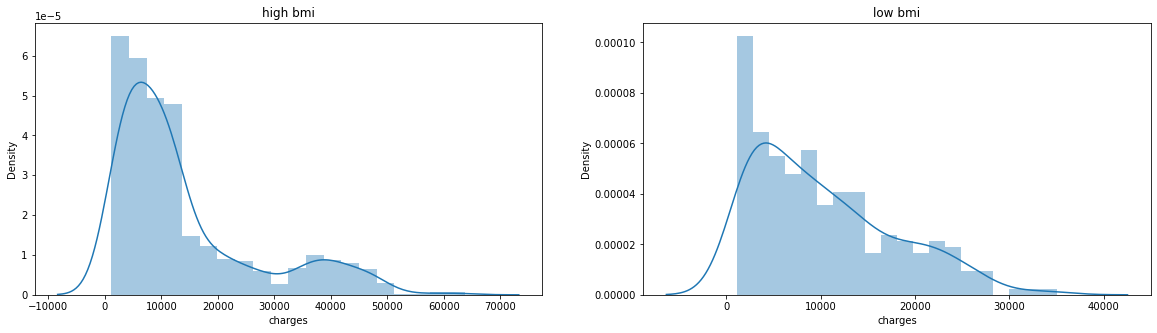

In [149]:
high_bmi = df[df["bmi"] > 25]
low_bmi = df[df["bmi"] <= 25]

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.distplot(high_bmi["charges"], bins=20)
plt.title("high bmi")

plt.subplot(1,2,2)
sns.distplot(low_bmi["charges"], bins=20)
plt.title("low bmi")

In [150]:
jumlah_high_bmi = high_bmi["bmi"].count()
jumlah_low_bmi = low_bmi["bmi"].count()
jumlah_high_bmi_16700 = high_bmi[high_bmi["charges"]>16700]["bmi"].count()
jumlah_low_bmi_16700 = low_bmi[low_bmi["charges"]>16700]["bmi"].count()

proporsi_pada_high_bmi = jumlah_high_bmi_16700 / jumlah_high_bmi
proporsi_pada_low_bmi = jumlah_low_bmi_16700 / jumlah_low_bmi

In [151]:
print("Peluang seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k:", proporsi_pada_high_bmi)
print("Peluang seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k:", proporsi_pada_low_bmi)

Peluang seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k: 0.25939505041246563
Peluang seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k: 0.20647773279352227


Mana yang lebih mungkin terjadi
- Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau
- Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

Text(0.5, 1.0, 'non smoker high bmi')

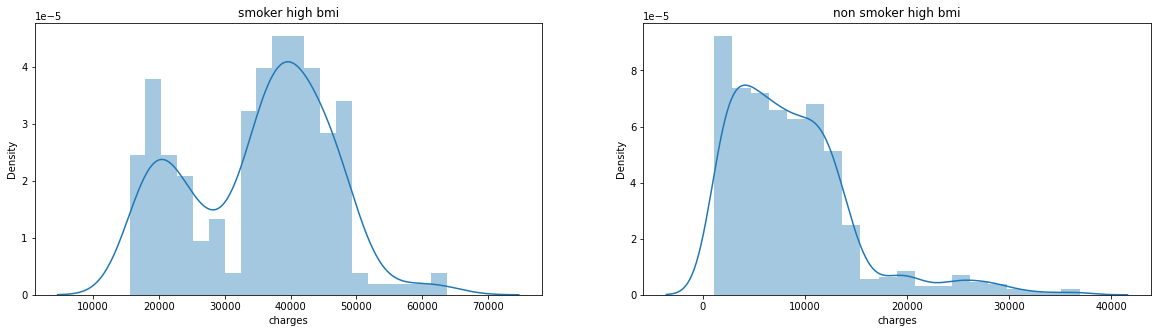

In [152]:
smoker_high_bmi = df[(df["bmi"] > 25) & (df["smoker"] == "yes")]
nonsmoker_high_bmi = df[(df["bmi"] > 25) & (df["smoker"] == "no")]

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.distplot(smoker_high_bmi["charges"], bins=20)
plt.title("smoker high bmi")

plt.subplot(1,2,2)
sns.distplot(nonsmoker_high_bmi["charges"], bins=20)
plt.title("non smoker high bmi")

In [153]:
jumlah_smoker_high_bmi = smoker_high_bmi["smoker"].count()
jumlah_nonsmoker_high_bmi = nonsmoker_high_bmi["smoker"].count()
jumlah_smoker_high_bmi_16700 = smoker_high_bmi[smoker_high_bmi["charges"]>16700]["bmi"].count()
jumlah_nonsmoker_high_bmi_16700 = nonsmoker_high_bmi[nonsmoker_high_bmi["charges"]>16700]["bmi"].count()

proporsi_pada_smoker_high_bmi = jumlah_smoker_high_bmi_16700 / jumlah_smoker_high_bmi
proporsi_pada_nonsmoker_high_bmi = jumlah_nonsmoker_high_bmi_16700 / jumlah_nonsmoker_high_bmi

In [154]:
jumlah_nonsmoker_high_bmi_16700

68

In [155]:
print("Peluang seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k:", proporsi_pada_smoker_high_bmi)
print("Peluang seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k:", proporsi_pada_nonsmoker_high_bmi)

Peluang seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k: 0.9817351598173516
Peluang seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k: 0.0779816513761468


## Langkah #4 - Analisa Korelasi Variabel

### Pertanyaan

<AxesSubplot:>

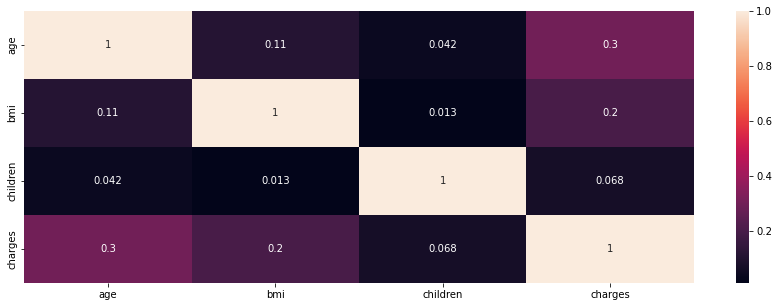

In [156]:
plt.figure(figsize=(15,5))

sns.heatmap(df.corr(), annot=True)

## Langkah #5 - Pengujian Hipotesis

### Hipotesis #1 Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok

In [157]:
df_smoker = df[df["smoker"] == "yes"]
df_nonsmoker = df[df["smoker"] == "no"]

charges_smoker = df_smoker["charges"]
charges_nonsmoker = df_nonsmoker["charges"]

In [158]:
mean_charges_smoker = np.mean(charges_smoker)
mean_charges_nonsmoker = np.mean(charges_nonsmoker)

print(mean_charges_smoker)
print(mean_charges_nonsmoker)

32050.23183153285
8434.268297856199


- Ho = Tagihan Perokok = Tagihan Non Perokok
- Ha = Tagihan Perokok > Tagihan Non Perokok

In [159]:
alpha = 0.05
ztest_Score, p_value = ztest(charges_smoker,charges_nonsmoker)

print(p_value)
if(p_value <  alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject NUll Hypothesis")

0.0
Reject Null Hypothesis


### Hipotesis #2 Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25

In [160]:
df_high_bmi = df[df["bmi"] > 25]
df_low_bmi = df[df["bmi"] <= 25]

charges_high_bmi = df_high_bmi["charges"]
charges_low_bmi = df_low_bmi["charges"]

In [161]:
mean_charges_high_bmi = np.mean(charges_high_bmi)
mean_charges_low_bmi = np.mean(charges_low_bmi)

print(mean_charges_high_bmi)
print(mean_charges_low_bmi)

13946.47603532447
10284.29002518219


- Ho = Tagihan BMI di atas 25 = Tagihan BMI di bawah 25
- Ha = Tagihan BMI di atas 25 > Tagihan BMI di bawah 25

In [162]:
alpha = 0.05
ztest_Score, p_value = ztest(charges_high_bmi,charges_low_bmi)

print(p_value)
if(p_value <  alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject NUll Hypothesis")

1.5606674279289402e-05
Reject Null Hypothesis


### Hipotesis #3 Tagihan kesehatan laki-laki lebih besar dari perempuan

In [163]:
df_male = df[df["sex"] == "male"]
df_female = df[df["sex"] == "female"]

charges_male = df_male["charges"]
charges_female = df_female["charges"]

In [164]:
mean_charges_male = np.mean(charges_male)
mean_charges_female = np.mean(charges_female)

print(mean_charges_male)
print(mean_charges_female)

13956.751177721886
12569.57884383534


- Ho = Tagihan Laki-laki = Tagihan Perempuan
- Ha = Tagihan Laki-laki > Tagihan Perempuan

In [165]:
alpha = 0.05
ztest_Score, p_value = ztest(charges_female, charges_male)

print(p_value)
if(p_value <  alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject NUll Hypothesis")


0.03594521741682005
Reject Null Hypothesis
